In [1]:
# From the recipes dataset, detemine if a food is a dessert or not based on how many calories it has

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("epi_r.csv")
df.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20052 entries, 0 to 20051
Columns: 680 entries, title to turkey
dtypes: float64(679), object(1)
memory usage: 104.0+ MB


In [4]:
df.shape

(20052, 680)

In [5]:
df.describe()

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
count,20052.000000,1.593500e+04,15890.000000,1.586900e+04,1.593300e+04,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,...,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000
mean,3.714467,6.322958e+03,100.160793,3.468775e+02,6.225975e+03,0.000299,0.000050,0.000848,0.001346,0.000349,...,0.001247,0.026332,0.000050,0.000299,0.014861,0.000150,0.000349,0.001396,0.000948,0.022741
std,1.340829,3.590460e+05,3840.318527,2.045611e+04,3.333182e+05,0.017296,0.007062,0.029105,0.036671,0.018681,...,0.035288,0.160123,0.007062,0.017296,0.121001,0.012231,0.018681,0.037343,0.030768,0.149080
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.750000,1.980000e+02,3.000000,7.000000e+00,8.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.375000,3.310000e+02,8.000000,1.700000e+01,2.940000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.375000,5.860000e+02,27.000000,3.300000e+01,7.110000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,3.011122e+07,236489.000000,1.722763e+06,2.767511e+07,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.isnull().sum()

title            0
rating           0
calories      4117
protein       4162
fat           4183
              ... 
cookbooks        0
leftovers        0
snack            0
snack week       0
turkey           0
Length: 680, dtype: int64

In [7]:
# remove outliers
new_df = df[df['calories'] < 10000]

In [8]:
# remove null values in calories column
new_df = new_df.dropna()

In [9]:
new_df.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,The Best Blts,4.375,948.0,19.0,79.0,1042.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
new_df.isnull().sum()

title         0
rating        0
calories      0
protein       0
fat           0
             ..
cookbooks     0
leftovers     0
snack         0
snack week    0
turkey        0
Length: 680, dtype: int64

In [11]:
# check to see if we have a dessert column
new_df.columns.values

array(['title', 'rating', 'calories', 'protein', 'fat', 'sodium',
       '#cakeweek', '#wasteless', '22-minute meals',
       '3-ingredient recipes', '30 days of groceries',
       'advance prep required', 'alabama', 'alaska', 'alcoholic',
       'almond', 'amaretto', 'anchovy', 'anise', 'anniversary',
       'anthony bourdain', 'aperitif', 'appetizer', 'apple',
       'apple juice', 'apricot', 'arizona', 'artichoke', 'arugula',
       'asian pear', 'asparagus', 'aspen', 'atlanta', 'australia',
       'avocado', 'back to school', 'backyard bbq', 'bacon', 'bake',
       'banana', 'barley', 'basil', 'bass', 'bastille day', 'bean',
       'beef', 'beef rib', 'beef shank', 'beef tenderloin', 'beer',
       'beet', 'bell pepper', 'berry', 'beverly hills', 'birthday',
       'biscuit', 'bitters', 'blackberry', 'blender', 'blue cheese',
       'blueberry', 'boil', 'bok choy', 'bon appétit', 'bon app��tit',
       'boston', 'bourbon', 'braise', 'bran', 'brandy', 'bread',
       'breadcrumbs', 

<AxesSubplot:xlabel='calories', ylabel='dessert'>

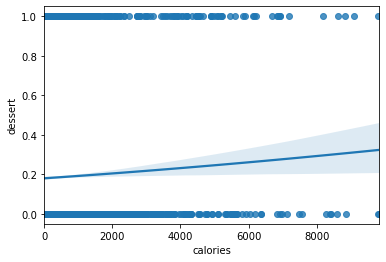

In [12]:
import seaborn as sns
sns.regplot(x="calories", y="dessert", data = new_df, logistic = True)

In [13]:
# new_df1 = new_df[["title", "calories", "dessert"]]

In [14]:
# new_df1.head()

In [15]:
# Train and test data split
X = new_df['calories']
y = new_df['dessert']


In [16]:
X.shape

(15843,)

In [17]:
y.shape

(15843,)

In [18]:
X = new_df[['calories']]
y = new_df[['dessert']]

In [19]:
X.shape

(15843, 1)

In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)

In [21]:
# logistic regression
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(x_train, y_train)
predictions = clf.predict(x_test)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.8083315800547023

In [33]:
from sklearn.metrics import f1_score
f1_score(y_test, predictions, average= 'weighted', labels=np.unique(predictions))

0.8940081442699244

In [34]:
from sklearn.metrics import classification_report
classification_report(y_test, predictions, zero_division="warn",  labels=np.unique(predictions))

'              precision    recall  f1-score   support\n\n         0.0       0.81      1.00      0.89      3842\n\n   micro avg       0.81      1.00      0.89      3842\n   macro avg       0.81      1.00      0.89      3842\nweighted avg       0.81      1.00      0.89      3842\n'